In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# preprocessing

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder



#evaluasi
from sklearn.metrics import mean_absolute_error

#Stastistik Deskriptif
from scipy import stats

#save model
import joblib
import json

import warnings
warnings.filterwarnings("ignore")


In [92]:
lung_cancer= pd.read_csv('survey_lung_cancer.csv', sep=",")
lung_cancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [93]:
len(lung_cancer)

309

# Pre-Processing Data Lung_Cancer


In [94]:
lung_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [95]:
prep_Lung_C = lung_cancer.dropna()
prep_Lung_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [96]:
prep_Lung_C.drop_duplicates()


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,1,2,2,2,1,1,2,2,1,2,1,2,1,YES
280,F,59,2,1,1,1,2,2,2,1,1,1,2,1,1,NO
281,M,55,2,1,1,1,1,2,2,1,1,1,2,1,2,NO
282,M,46,1,2,2,1,1,1,1,1,1,1,1,2,2,NO


In [97]:
prep_Lung_C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

No missing value karena barisnya sama seperti ukuran banyak baris/sample

In [98]:
prep_Lung_C.to_excel('lung_cancer.xlsx', sheet_name='lungcancer1')

In [99]:
data = pd.DataFrame(prep_Lung_C)
print(data.corr())

                            AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
AGE                    1.000000 -0.084475        0.005205  0.053170   
SMOKING               -0.084475  1.000000       -0.014585  0.160267   
YELLOW_FINGERS         0.005205 -0.014585        1.000000  0.565829   
ANXIETY                0.053170  0.160267        0.565829  1.000000   
PEER_PRESSURE          0.018685 -0.042822        0.323083  0.216841   
CHRONIC DISEASE       -0.012642 -0.141522        0.041122 -0.009678   
FATIGUE                0.012614 -0.029575       -0.118058 -0.188538   
ALLERGY                0.027990  0.001913       -0.144300 -0.165750   
WHEEZING               0.055011 -0.129426       -0.078515 -0.191807   
ALCOHOL CONSUMING      0.058985 -0.050623       -0.289025 -0.165750   
COUGHING               0.169950 -0.129471       -0.012640 -0.225644   
SHORTNESS OF BREATH   -0.017513  0.061264       -0.105944 -0.144077   
SWALLOWING DIFFICULTY -0.001270  0.030718        0.345904  0.489403   
CHEST 

## Statistik Deskriptif

Ukuran Pemusatan Data

In [100]:
prep_Lung_C.mean()


AGE                      62.673139
SMOKING                   1.563107
YELLOW_FINGERS            1.569579
ANXIETY                   1.498382
PEER_PRESSURE             1.501618
CHRONIC DISEASE           1.504854
FATIGUE                   1.673139
ALLERGY                   1.556634
WHEEZING                  1.556634
ALCOHOL CONSUMING         1.556634
COUGHING                  1.579288
SHORTNESS OF BREATH       1.640777
SWALLOWING DIFFICULTY     1.469256
CHEST PAIN                1.556634
dtype: float64

In [101]:
prep_Lung_C.median()

AGE                      62.0
SMOKING                   2.0
YELLOW_FINGERS            2.0
ANXIETY                   1.0
PEER_PRESSURE             2.0
CHRONIC DISEASE           2.0
FATIGUE                   2.0
ALLERGY                   2.0
WHEEZING                  2.0
ALCOHOL CONSUMING         2.0
COUGHING                  2.0
SHORTNESS OF BREATH       2.0
SWALLOWING DIFFICULTY     1.0
CHEST PAIN                2.0
dtype: float64

In [102]:
prep_Lung_C.quantile(0.5)

AGE                      62.0
SMOKING                   2.0
YELLOW_FINGERS            2.0
ANXIETY                   1.0
PEER_PRESSURE             2.0
CHRONIC DISEASE           2.0
FATIGUE                   2.0
ALLERGY                   2.0
WHEEZING                  2.0
ALCOHOL CONSUMING         2.0
COUGHING                  2.0
SHORTNESS OF BREATH       2.0
SWALLOWING DIFFICULTY     1.0
CHEST PAIN                2.0
Name: 0.5, dtype: float64

In [103]:
prep_Lung_C.quantile(0.75)

AGE                      69.0
SMOKING                   2.0
YELLOW_FINGERS            2.0
ANXIETY                   2.0
PEER_PRESSURE             2.0
CHRONIC DISEASE           2.0
FATIGUE                   2.0
ALLERGY                   2.0
WHEEZING                  2.0
ALCOHOL CONSUMING         2.0
COUGHING                  2.0
SHORTNESS OF BREATH       2.0
SWALLOWING DIFFICULTY     2.0
CHEST PAIN                2.0
Name: 0.75, dtype: float64

Ukuran Penyebaran Data

In [104]:
np.var(prep_Lung_C)

AGE                      67.190897
SMOKING                   0.246018
YELLOW_FINGERS            0.245159
ANXIETY                   0.249997
PEER_PRESSURE             0.249997
CHRONIC DISEASE           0.249976
FATIGUE                   0.220023
ALLERGY                   0.246793
WHEEZING                  0.246793
ALCOHOL CONSUMING         0.246793
COUGHING                  0.243713
SHORTNESS OF BREATH       0.230182
SWALLOWING DIFFICULTY     0.249055
CHEST PAIN                0.246793
dtype: float64

In [105]:
np.std(prep_Lung_C)

AGE                      8.197005
SMOKING                  0.496002
YELLOW_FINGERS           0.495135
ANXIETY                  0.499997
PEER_PRESSURE            0.499997
CHRONIC DISEASE          0.499976
FATIGUE                  0.469066
ALLERGY                  0.496782
WHEEZING                 0.496782
ALCOHOL CONSUMING        0.496782
COUGHING                 0.493673
SHORTNESS OF BREATH      0.479773
SWALLOWING DIFFICULTY    0.499054
CHEST PAIN               0.496782
dtype: float64

## Deteksi Outlier

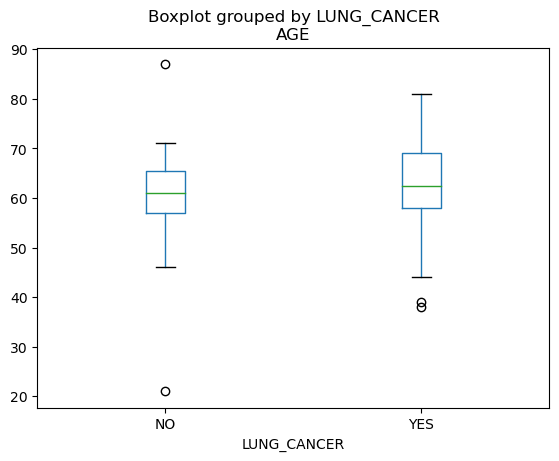

In [106]:
prep_Lung_C.boxplot(by ='LUNG_CANCER', column =['AGE'], grid = False)
plt.show()

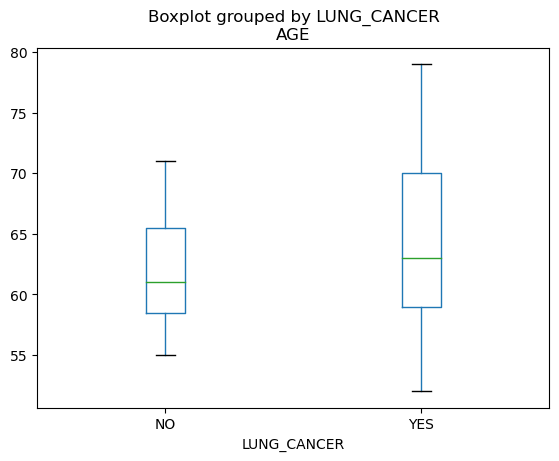

In [107]:
q1 = prep_Lung_C['AGE'].quantile(0.5)
q3 = prep_Lung_C['AGE'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
prep_Lung_C = prep_Lung_C.loc[(prep_Lung_C['AGE'] > fence_low) & (prep_Lung_C['AGE'] < fence_high)]
    

prep_Lung_C.boxplot(by ='LUNG_CANCER', column =['AGE'], grid = False)
plt.show()

## Classification Model (Supervised Learning)

In [108]:
from sklearn.metrics import classification_report


#variable independent

In [109]:
X = prep_Lung_C.iloc[:,1:15]
X.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1


In [110]:
len(X)

283

In [111]:
#variable dependent

In [112]:
Y = prep_Lung_C.loc[:,['LUNG_CANCER']]
Y.head()

,LUNG_CANCER
0,YES
1,YES
2,NO
3,NO
4,NO


In [113]:
len(Y)

283

In [114]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
# Split into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state =42, stratify=Y)

In [115]:
X_train.head()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
212,58,2,1,1,1,1,2,2,2,2,2,2,1,2
237,54,2,2,2,2,2,2,1,2,1,2,1,2,2
157,57,2,2,1,2,1,1,1,1,1,1,1,1,2
122,57,2,1,2,1,2,2,1,1,1,1,2,1,1
56,63,1,2,1,2,1,2,1,1,1,2,2,1,2


## Decision Tree (Classification)

In [116]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [117]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [118]:
#predict
prediksi_dt = dt.predict(X_test)
print(prediksi_dt)

['YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES']


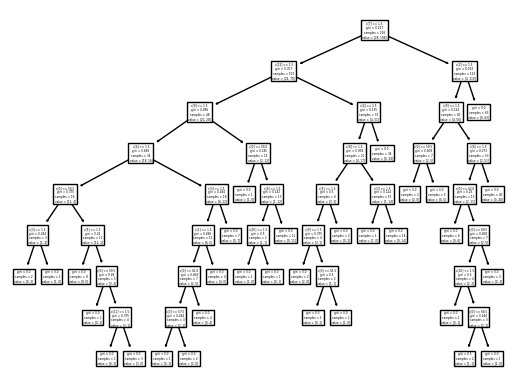

In [119]:
tree.plot_tree(dt)
plt.show()

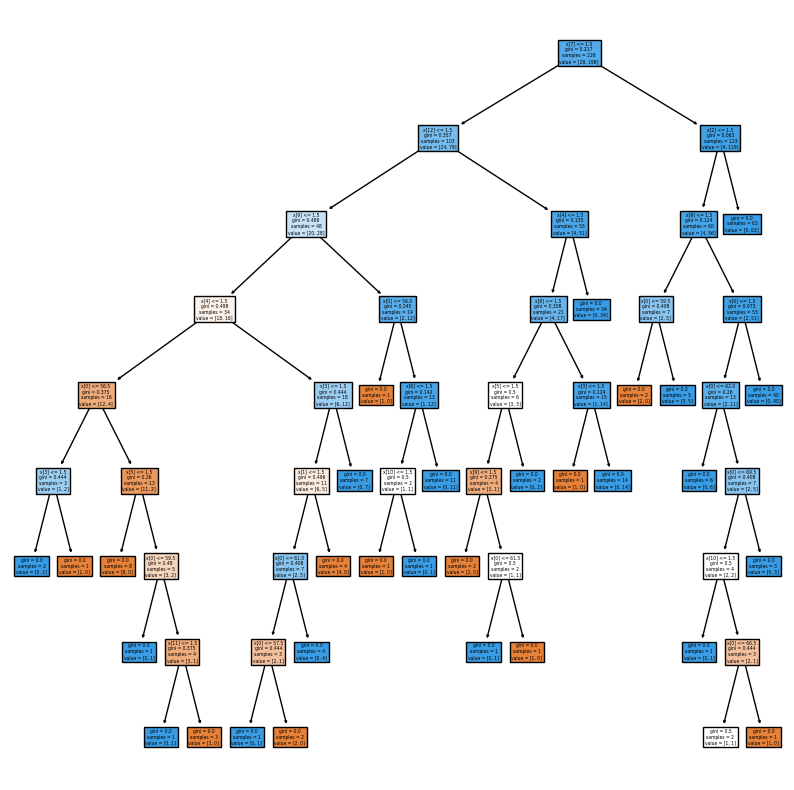

In [120]:
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt,filled=True)
plt.show()

In [121]:
print(classification_report(Y_test, prediksi_dt))

              precision    recall  f1-score   support

          NO       0.55      0.86      0.67         7
         YES       0.98      0.90      0.94        50

    accuracy                           0.89        57
   macro avg       0.76      0.88      0.80        57
weighted avg       0.93      0.89      0.90        57



In [122]:
dt2 = tree.DecisionTreeClassifier(max_depth=5)


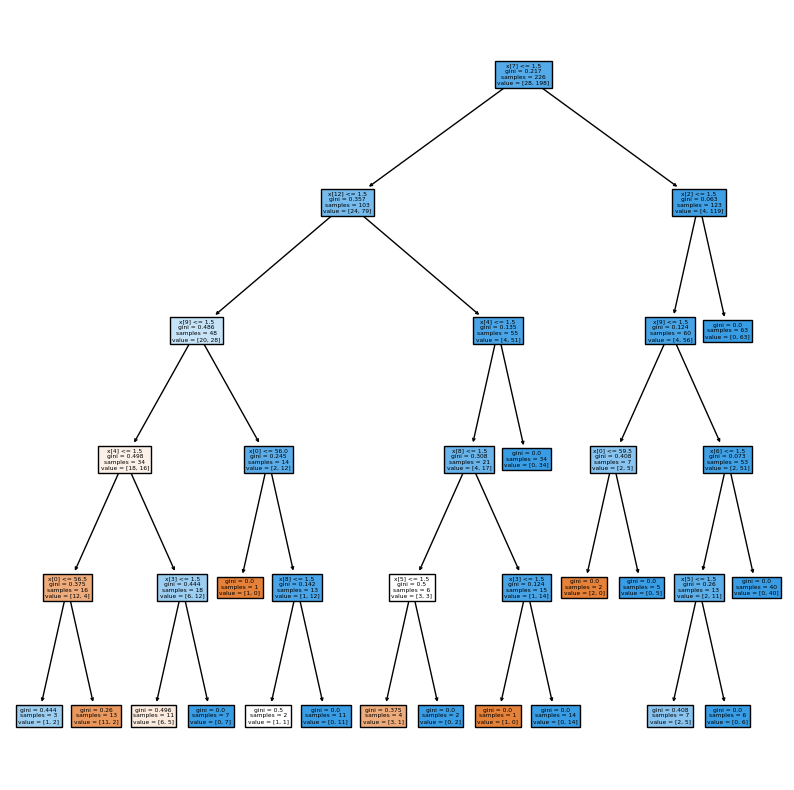

In [123]:
dt2.fit(X_train,Y_train)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt2,filled=True)
plt.show()

In [124]:
prediksi_dt2 = dt2.predict(X_test)

In [125]:
print(classification_report(Y_test, prediksi_dt2))

              precision    recall  f1-score   support

          NO       0.54      1.00      0.70         7
         YES       1.00      0.88      0.94        50

    accuracy                           0.89        57
   macro avg       0.77      0.94      0.82        57
weighted avg       0.94      0.89      0.91        57



In [126]:
dt3 = tree.DecisionTreeClassifier(max_depth=20)

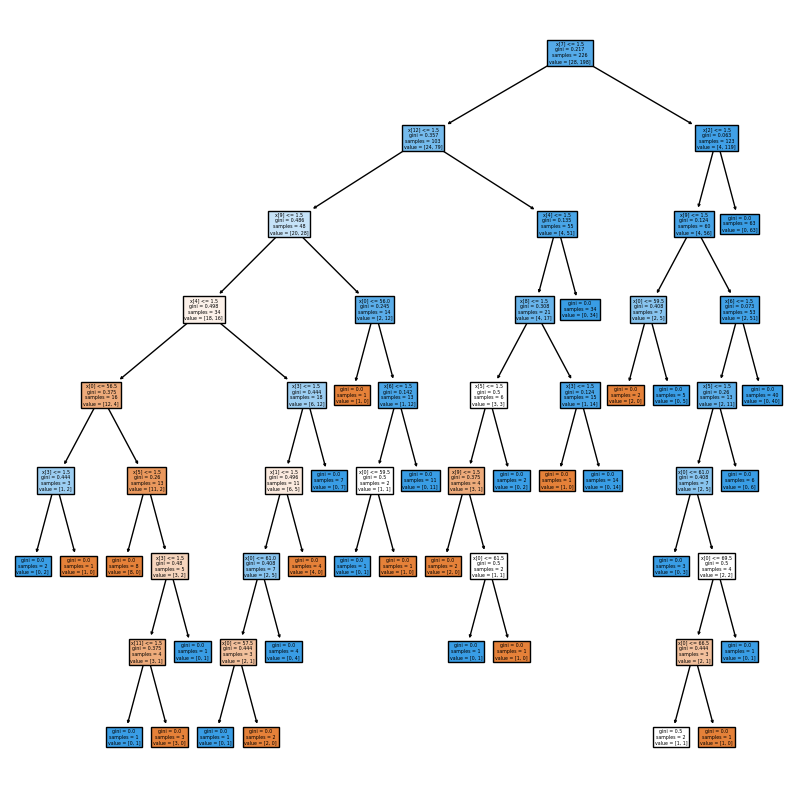

In [127]:
dt3.fit(X_train,Y_train)
fig = plt.figure(figsize=(10,10))
_ = tree.plot_tree(dt3,filled=True)
plt.show()

In [128]:
prediksi_dt3 = dt3.predict(X_test)

In [129]:
print(classification_report(Y_test, prediksi_dt3))

              precision    recall  f1-score   support

          NO       0.50      0.86      0.63         7
         YES       0.98      0.88      0.93        50

    accuracy                           0.88        57
   macro avg       0.74      0.87      0.78        57
weighted avg       0.92      0.88      0.89        57



konklusinya semakin tinggi nilai max_depthnya, semakin tinggi juga tingkat akurasinya


## Naive Bayes(Classification)


In [130]:
from sklearn.naive_bayes import GaussianNB
gsnb = GaussianNB()

In [131]:
#Learning algo
gsnb.fit(X_train,Y_train)


GaussianNB()

In [132]:
#Prediksi
prediction_nb =gsnb.predict(X_test)
print(prediction_nb)


['YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'NO' 'NO'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES'
 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES' 'YES']


In [133]:
print(classification_report(Y_test, prediction_nb))

              precision    recall  f1-score   support

          NO       0.67      0.57      0.62         7
         YES       0.94      0.96      0.95        50

    accuracy                           0.91        57
   macro avg       0.80      0.77      0.78        57
weighted avg       0.91      0.91      0.91        57

